<div style="margin: 0 auto 30px; height: 60px; border: 2px solid gray; border-radius: 6px;">
  <div style="float: left;"><img src="img/epfl.png" /></div>
  <div style="float: right; margin: 20px 30px 0; font-size: 10pt; font-weight: bold;"><a href="https://moodle.epfl.ch/course/view.php?id=18253">COM202 - Signal Processing</a></div>
</div>
<div style="clear: both; font-size: 30pt; font-weight: bold; color: #483D8B;">
    Lab 4: Plotting the DFT
</div>

In this notebook we will look at the practical issues associated to plotting the DFT, in particular the DFT of real-world signals. We will examine how to map the DFT coefficients to real-world frequencies, and investigate the frequency resolution of the DFT and the effects of zero padding.

In [30]:
# first our usual bookkeeping
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [31]:
plt.rcParams["figure.figsize"] = (14,4)

# Introduction

As a quick reminder, the definition of the Discrete Fourier Transform for a length-$N$ signal is:

$$
    X[k] = \sum_{n=0}^{N-1} x[n]\, e^{-j\frac{2\pi}{N}nk}, \quad k=0, \ldots, N-1.
$$

As we have seen, the DFT is a change of basis in $\mathbb{C}^N$; whereas we normally look at the signal in the time domain, that is, as a sequence of individual samples $x[n]$ for $n = 0, 1, \ldots, N-1$, the frequency representation of the information contained in $x$ can equivalently be expressed as a linear combination of the $N$ harmonic oscillations in $\mathbb{C}^N$, $w_k[n] = e^{j\frac{2\pi}{N}nk}$,

$$
    x[n] = \sum_{k=0}^{N-1} X[k]\, e^{j\frac{2\pi}{N}nk}
$$

and the coefficients in the linear combination are the $N$ DFT coefficients $X[k]$.

## Magnitude, phase, power

Each complex-valued DFT coefficient, as the weight associated to the harmonic oscillation $w_k[n]$ in the reconstruction formula, carries two pieces of information:

 * the magnitude $|X[k]|$ indicates "how much" of the oscillation $w_k[n]$ is contained in the signal $x[n]$
 * the phase $\angle X[k]$ indicates the best alignment between the oscillation $w_k[n]$ and the signal $x[n]$
 
Because of the orthogonality between harmonic oscillations, the information contained in the magnitude indicates the portion of the total energy in the signal $x[n]$ that is accounted for by the oscillation $w_k[n]$. Up to a scaling factor, the energy is preserved by the transformation:

$$
    \sum_{n=0}^{N-1} |x[n]|^2 = N\,  \sum_{k=0}^{N-1} |X[k]|^2
$$

# Computing the DFT
In Python, we will use the `fft` module in Numpy to compute the DFT. Typically, we will take a vector of data points, compute the DFT and plot the magnitude of the result. For instance, consider the DFT of a symmetric linear ramp:

In [32]:
def ramp(N):
    # N-point linear ramp between -1 and +1 inclusive
    return np.array([2 * n / (N - 1) - 1 for n in range(0, N)])

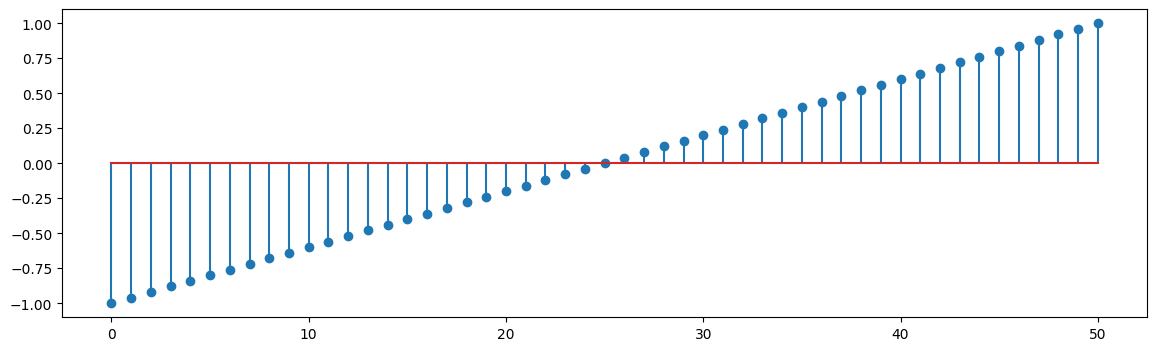

In [33]:
x = ramp(51)
plt.stem(x);

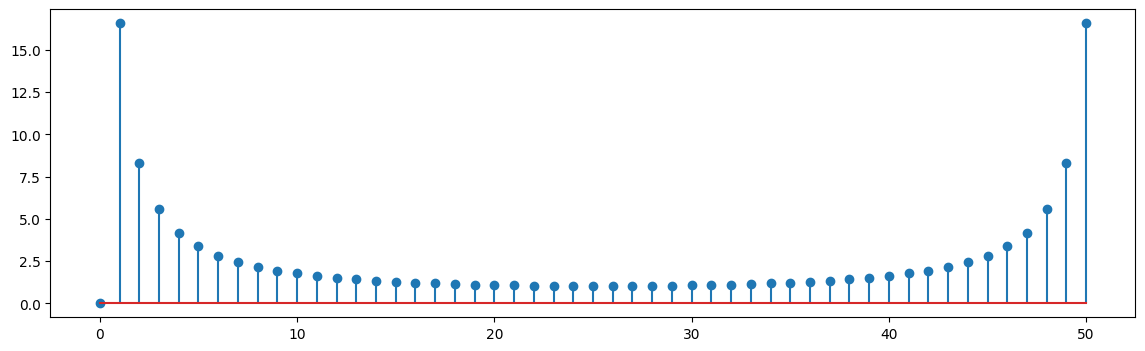

In [34]:
X = np.fft.fft(x)
plt.stem(abs(X));

**Questions:** why is the first DFT coefficient equal to zero? What happens if you plot the DFT of a ramp signal that goes from 0 to 2 (that is, a ramp shifted by one in amplitude)?

The first DFT coefficient equal zero because it is equal to the mean of the signal values which is zero by symmetry. 

For the second question: 

np.array((2x0)/1 - 1, (2x1)/1 -1) = np.array(- 1, 1)
so we have => (0, -1) and (1, 1)

## Positive and negative frequencies

Because of the $2\pi$-periodicity of complex exponentials, a frequency $\omega$ between $\pi$ and $2\pi$ is equivalent to a _negative_ frequency of $\omega - 2\pi$; example: $5\pi / 4$ belongs to $\pi$ and $2\pi$ and is the same as : $5\pi / 4 - 2\pi = -3\pi / 4$. If we imagine the oscillation as the position of a point rotating in a circular pattern, positive and negative frequencies correspond to counterclockwise and clockwise rotations, respectively. Two frequencies with equal magnitude but opposite sign indicate two rotations with the same angular velocity but with opposite "spin". 

When we consider the full set of $N$ DFT coefficients, the second half of the coefficients can thus be associated to negative frequencies of the form

$$
    \omega_k = \frac{2\pi}{N}k - 2\pi = -\frac{2\pi}{N}(N - k)  \quad \text{for } k \ge L = \lceil N / 2 \rceil.
$$

Because of this, it often makes more sense to rearrange the DFT so that the second half of the coefficients comes before the first and to plot the coefficients centered around zero with positive frequencies on the right and negative frequencies on the left. This is also consistent with the way other types of spectra are usually plotted, as in the case of infinite sequences or of continuous-time signals.

(If not clear see just below =>). Finally, remember that if the original signal is real-valued then the magnitude of the DFT is symmetric around its midpoint, so that in practice we  need to plot only the first half of the DFT coefficients. The same holds if we are interested in the phase of the DFT which, for real-valued inputs, is antisymmetric around its midpoint.

=> More clearly, if the original signal is real-valued then the magnitude of the DTF is symmetric around its midpoint (at this point the left side of the mid point is equal to the right side of it => hence we only need to plot the first half as the second is similar

## Centering the DFT around zero

There is an important detail that we must take into account when rearranging the DFT coefficients, namely, **we need to differentiate between odd- and even-length signals**. Indeed, assume the signal (and the DFT) are of length $N$; if we want to rearrange the DFT coefficients so that $X[0]$ becomes the center point

 * For **odd-length** signals, we can write $N = 1 + 2L$ with $L = (N-1)/2 \in \mathbb{N}$, and so the maximum positive frequency corresponds to the index $k=L$ while the minimum negative frequency corresponds to index $k=L+1$; with this:
   * the $L$ coefficients $X[1]$ to $X[L]$ correspond to the positive frequencies ranging from $\omega_1 = 2\pi/N$ to $\omega_L = \pi - \pi/N$ (take a look at the indices k = 1 and k = L = (N-1)/2 to understand)
   * the $L$ coefficients $X[L+1]$ to $X[N-1]$ correspond to the negative frequencies ranging from $\omega_{-L} = -\pi + \pi/N$ to $\omega_{-1} = -2\pi/N$ 
 
 * For **even-length** signals, $N = 2L$, with $L = N/2 \in \mathbb{N}$ and so the maximum positive frequency _and_ the minumum negative frequency are _both_ associated to index $k=L$; indeed, $\omega_{L} = \frac{2\pi}{N}\frac{N}{2} = \pi$ and therefore $|\omega_L| = |\omega_L - 2\pi| = \pi$. We therefore need to reuse coefficient number $L$ as the value associated to the minimum negative frequency:
   * the $L$ coefficients $X[1]$ to $X[L]$ correspond to the positive frequencies ranging from $\omega_1 = 2\pi/N$ to $\omega_L = \pi$
   * the $L$ coefficients $X[L]$ to $X[N-1]$ correspond to the negative frequencies ranging from $\omega_{-L} = -\pi$ to $\omega_{-1} = -2\pi/N$ 

With this strategy, we obtain a symmetric DFT magnitude data set in both cases:
 * if $N$ is **odd**, the re-arranged DFT data will be of length $N$ 
 * if $N$ is **even**, the re-arranged DFT data will be of length $N+1$  

### Exercise: rearranging the DFT data

Complete the code below to implement the rearranging strategy detailed in the previous cell

In [35]:
# We pass the DFT transformation X in argument
def dft_center(X):
    N = len(X)
    if N % 2 == 0:
        L = N//2 # we need // instead of / because we don't want floating point but integer values
        return np.r_[X[L:], X[:L+1]]
    else:
        L = (N-1)//2
        return np.r_[X[L+1:], X[:L+1]]

Let's test your solution:

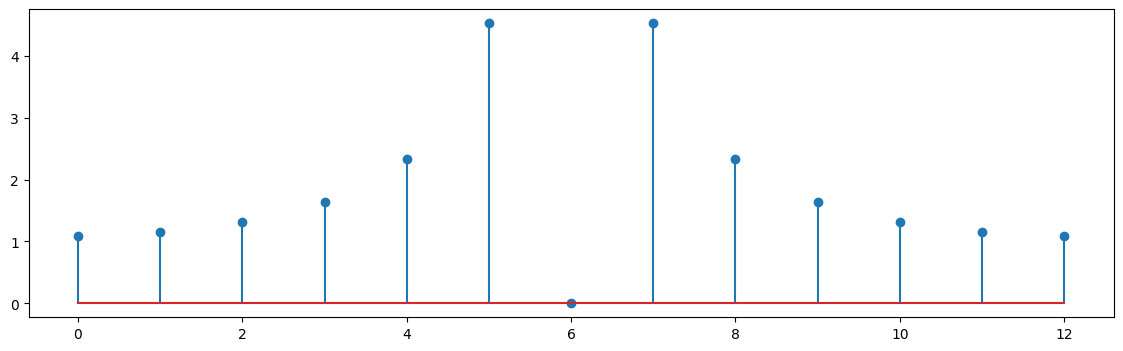

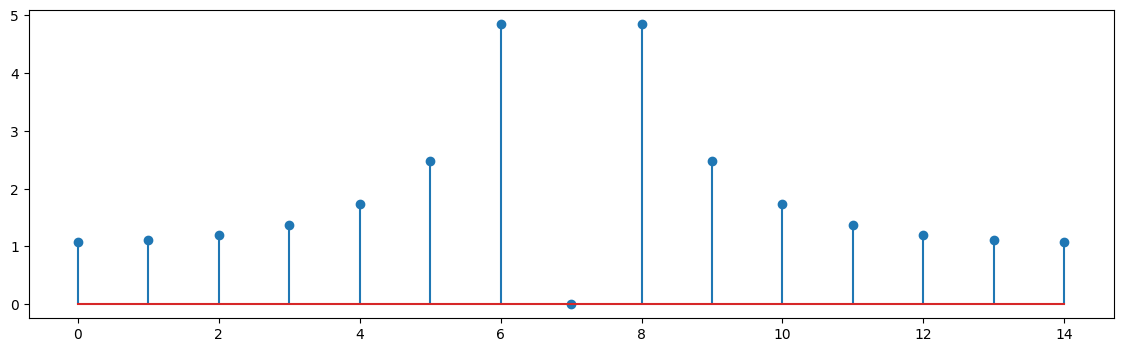

In [36]:
for N in [13, 14]:
    X = dft_center(np.fft.fft(ramp(N)))
    assert np.allclose(np.sum(X[:len(X)//2] - np.conj(X[:len(X)//2:-1])), 0), 'sorry, try again'
    plt.figure();
    plt.stem(np.abs(X));

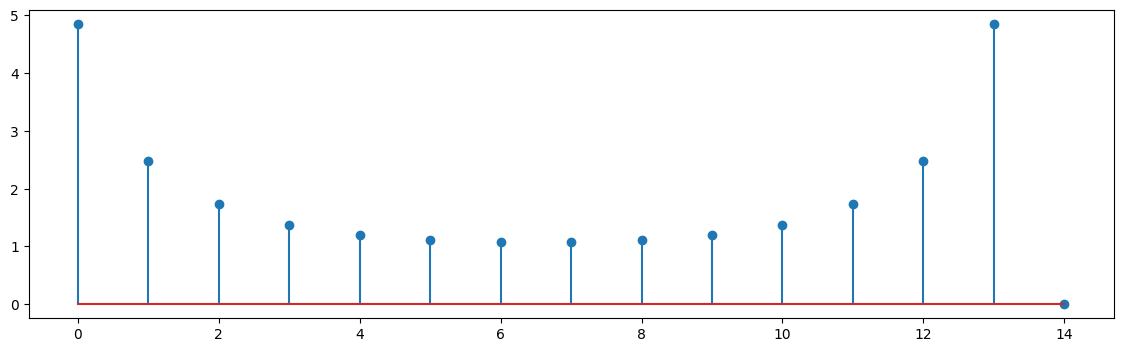

In [37]:
plt.stem(np.abs(dft_center(X)));

### Exercise: signed indexes

In order to plot the DFT coefficients symmetrically around zero, we need to not only rearrange the data but also associate each data point to a signed index between $-L$ and $L$, with $L=\lceil N / 2 \rceil$ as before. Modify the previous function to return both the signed indexes and the rearranged data.

The previous function does shift the vector, the indices are still from zero to $N-1$. Let's modify it so that we returs also the proper values for the indices:

In [38]:
def dft_shift(X):
    L = len(X) // 2
    return np.arange(-L, L + 1), np.r_[ X[L+(len(X) % 2):], X[:L+1] ]

Let's test:

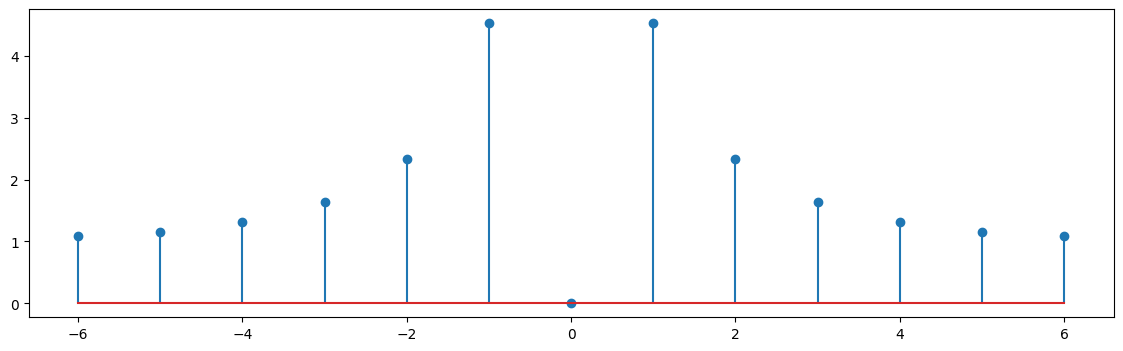

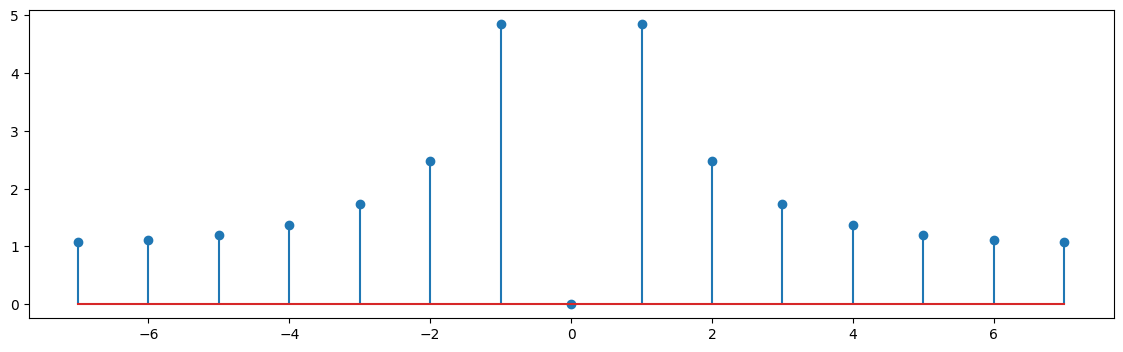

In [39]:
for N in [13, 14]:
    ix, X = dft_shift(np.fft.fft(ramp(N)))
    assert np.allclose([ np.sum(ix), np.sum(X[:len(X)//2] - np.conj(X[:len(X)//2:-1]))], 0), 'sorry, try again'
    plt.figure();
    plt.stem(ix, np.abs(X));

# Mapping the DFT index to real-world frequencies

The next step is to use the DFT to analyze real-world signals. The only piece of information that we need to do so is the length in seconds of the time interval $T_s$ that separates successive samples or, equivalently, the _sampling frequency_ $F_s = 1/T_s$ of the input signal; note that real-world frequencies are measured in hertz (Hz). 

With this, the reasoning proceeds as follows:
 * the $k$-th DFT coefficient is associated to a discrete-time oscillation that completes $k$ full cycles over $N$ samples
 * if the time between successive samples is $T_s$, then the $k$-th oscillation completes $k$ cycles over $NT_s$ seconds
 * therefore, one cycle (that is, the period) of the $k$-th oscillation is $NT_s/k$ seconds
 * and so the frequency of the $k$-th oscillation is $k(F_s/N)$ hertz.
 
The mapping between DFT indexes and their associated real-world frequency value in hertz is therefore linear and note that the proportionality factor $\Delta_f = F_s/N$ represents the maximum frequency resolution provided by a DFT of length $N$ for a signal at sampling frequency $F_s$.

In [40]:
def dft_map(X, Fs, shift=True):
    if shift:
        n, Y = dft_shift(X)
    else:
        n, Y = np.arange(0, len(X)), X
    f = n * float(Fs) / len(X)
    return f, Y

## The spectrum of a piano note

In the case of audio files, the sampling frequency is usually provided in the file metadata and Python provides convenient libraries to read both the metadata and the audio samples. Here for instance we load and play the recording of a single piano note:

In [44]:
import IPython
from scipy.io import wavfile

Fs, x = wavfile.read("data/piano.wav")
print(f'the audio sampling rate is {Fs} Hz')
IPython.display.Audio(x, rate=Fs)

the audio sampling rate is 16000 Hz


Let's use the previous function to plot the spectrum of the note:

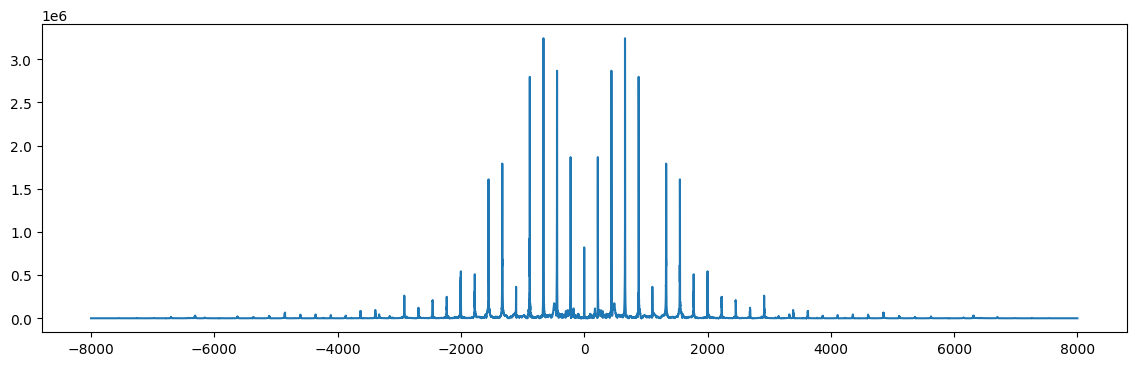

In [45]:
# we don't need to compute the DFT of the whole signal, given its size
X = np.fft.fft(x[:32768])
f, Y = dft_map(X, Fs)
plt.plot(f, abs(Y));

The plot shows what a spectrum analyzer would display. The clear spectral lines indicate a periodically repeating pattern in the time-domain waveform, which is the typical characteristic of musical sounds. We can easily verify this  by plotting a portion of the time-domain data:

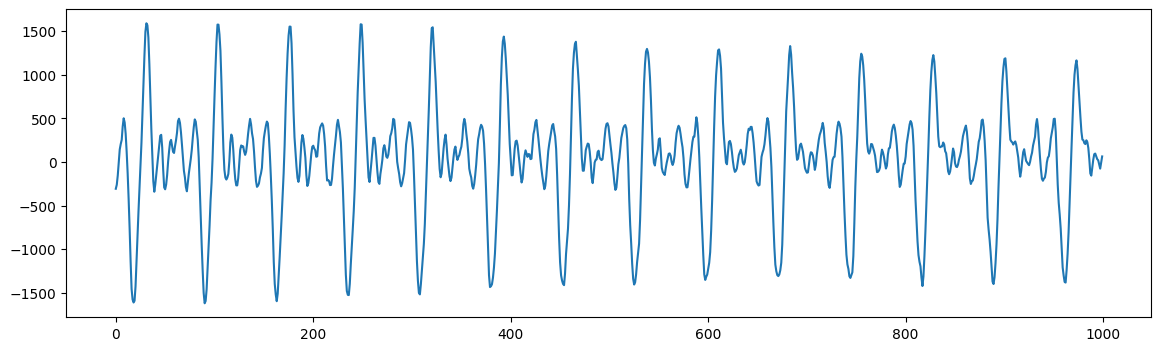

In [46]:
plt.plot(x[9000:10000]);

## Musical pitch

Sounds that contain a periodically repeating pattern evoke in a listener the sensation of musical _pitch_; waveforms with a pattern that repeats quickly are associated to notes in the so-called high register, whereas slowly repeating patterns produce notes in the low register. 

### The fundamental frequency

In the frequency domain, waveforms with a pattern that repeats $f_0$ times per second will have a spectrum containing clearly distinct lines at all integer multiples of $f_0$, which is called the _fundamental frequency_ of the musical note. 

To determine $f_0$ we need to locate the position of first spectral peak. This is one of the instances in which shifting the DFT is not necessary, since we only need to look in the positive frequency range. So let's plot the spectrum of the piano note again, still mapping the DFT indexes to real-world frequencies but omitting the shift:

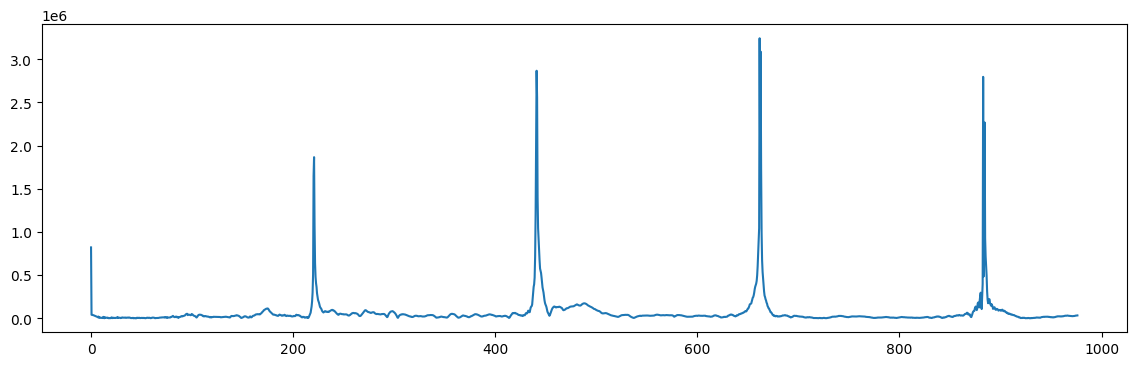

In [47]:
f, S = dft_map(X, Fs, shift=False)
plt.plot(f[:2000], abs(S[:2000]));

We can see that the first peak is in the vicinity of 200Hz; to find the exact fundamental frequency (to within the resolution afforded by this DFT) let's find its exact location.

### Exercise: find a local spectral peak

Complete the following function so that it returns the frequency corresponding to the maximum value of the spectrum in the $[f_\min, f_\max]$ range:

In [48]:
def search_peak(X, fmin, fmax, Fs):
    assert fmin < fmax, 'invalid frequency range'
    # inverse mapping from frequency range to DFT indexes
    delta_f = Fs / len(X)
    k_range = (np.array([fmin, fmax]) / delta_f).astype(int)
    ix = np.argmax(np.abs(X[slice(*k_range)])) + k_range[0]
    return ix * delta_f

Let's test it:

In [49]:
print('good job!' if np.abs(search_peak(S, 200, 260, Fs) - 220.7) < 0.01 else 'sorry try again')

good job!


### From frequency to pitch

In Western music, the pitch of a note is indicated using the name of the note in the 12-tone equal-tempered scale, followed by a number denoting the octave that the note belongs to; for more details, see for instance [here](https://en.wikipedia.org/wiki/Equal_temperament). A full list of nominal pitch frequencies is availble [here](https://pages.mtu.edu/~suits/notefreqs.html).

The following function converts a frequency value in hertz to pitch notation:

In [50]:
def freq2pitch(f):
    C4, delta, octave = 261.63, 2 ** (1/24), 4
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    while f < C4 / delta:
        f = f * 2
        octave -= 1
    while f > C4 * 2 * delta:
        f = f / 2
        octave += 1
    return notes[int(np.round(12 * np.log(f / C4) / np.log(2)))] + str(octave)

The piano note is in fact an A in the 3rd octave:

In [51]:
freq2pitch(search_peak(S, 150, 250, Fs))

'A3'

### Exercise: find the pitch

Find the pitch of the note contained in the following audio file (it should be a C4):

In [52]:
Fs_g, x_g = wavfile.read("data/guitar.wav")
IPython.display.Audio(x_g, rate=Fs_g)

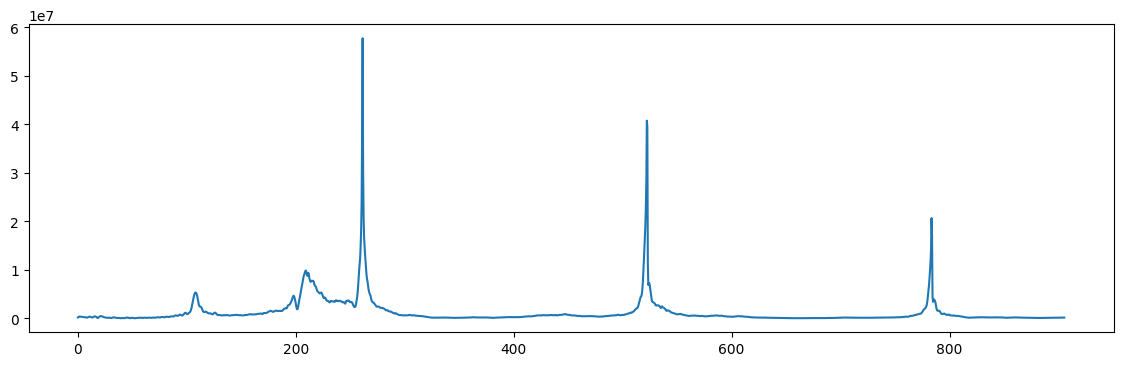

In [55]:
X_g = np.fft.fft(x_g)
f_g, S_g = dft_map(X_g, Fs_g, shift=False)
plt.plot(f_g[:2000], np.abs(S_g[:2000]));

In [56]:
freq2pitch(search_peak(S_g, 200, 300, Fs_g))

'C4'

# The frequency resolution of the DFT

Given a signal of length $N$, two successive coefficients in its DFT are associated to oscillations whose frequencies are spaced apart by $\Delta_N = 2\pi/N$; this value is called the _resolution_ of the DFT and it is only dependent on $N$, the number of data points in the time domain.

As an analysis tool, an $N$-point DFT partitions the frequency axis into $N$ frequency _bins_ of width $\Delta_N$. If a signal contains sinusoidal components that fall into the same frequency bin, the DFT will not be able to tell them apart. Similarly, the spectrum of a signal containing frequencies in neighboring frequency bins will not feature clearly identifiable spectral lines, as the examples below are going to show.

## Examples

Consider a discrete-time signal of the form $x[n] = \cos(\omega_0 \, n) + \cos((\omega_0 + \delta) n)$. The DFT of a length-$N$ portion of $x[n]$ will show two distinct spectral peaks only if $\delta > 2\Delta_N$ (where "distinct" indicates spectral peaks that have a clear gap between them):

In [57]:
def two_cos(w, d, N):
    n = np.arange(0, N)
    return np.cos(w * n) + np.cos((w + d) * n)

In [58]:
w = 0.1 * np.pi 

N = 240
DN = 2 * np.pi / N

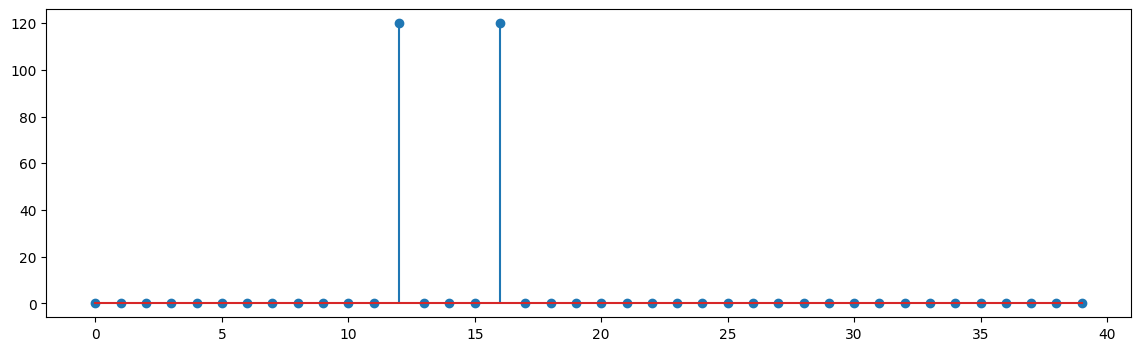

In [59]:
# here we can see a separation of 4 bins
plt.stem(np.abs(np.fft.fft(two_cos(w, 4 * DN, N))[:40]));

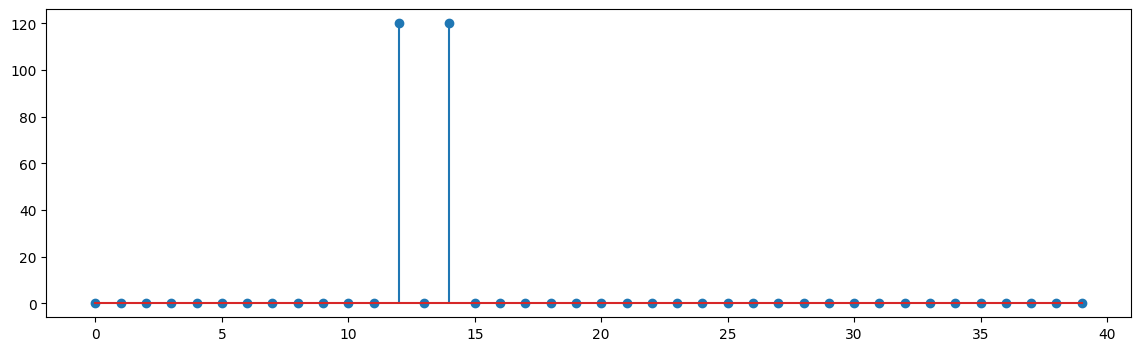

In [60]:
# separation of two bins
plt.stem(np.abs(np.fft.fft(two_cos(w, 2 * DN, N))[:40]));

Note that the DFT of a sinusoidal signal will contain a single spectral line only if the frequency of the sinusoid is a multiple of $2\pi/N$; in all other cases the spectral peaks in the DFT will "spill over" to the other bins. This phenomenon is known as "spectral leakage" and it will affect the ability to clearly detect the frequency of the underlying sinusoidal components. 

In the following example, for instance, you can see how the peak of the second sinusoidal component is spread out over two bins and the associated leakage makes it harder to see the gap between spectral peaks. Nevertheless, as long as $\delta > 2\Delta_N$, there will always be a local minimum between two local maxima.

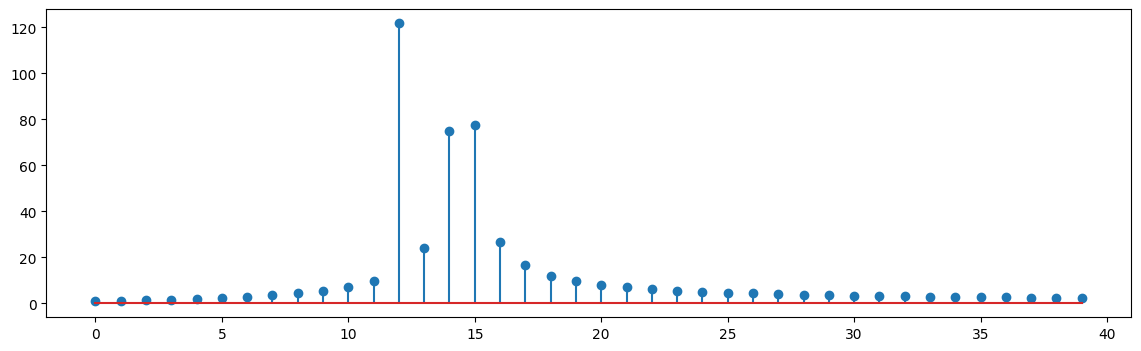

In [61]:
# separation of two bins
plt.stem(np.abs(np.fft.fft(two_cos(w, 2.5 * DN, N))[:40]));

Conversely, when $\delta < 2\Delta_N$, the spectral peaks will blend into one. The next two plots show that two frequencies in the same bin produce a plot that has the same shape as for a signal with two frequencies in neighboring bins:

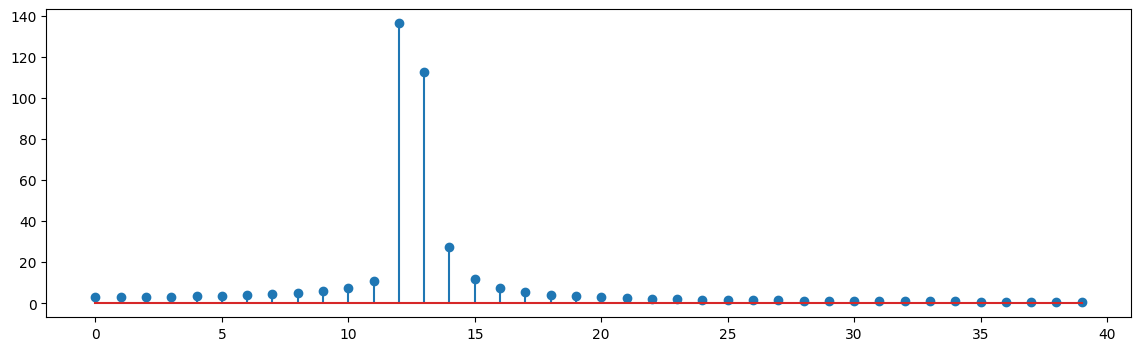

In [62]:
plt.stem(np.abs(np.fft.fft(two_cos(w, 1.2 * DN, N))[:40]));

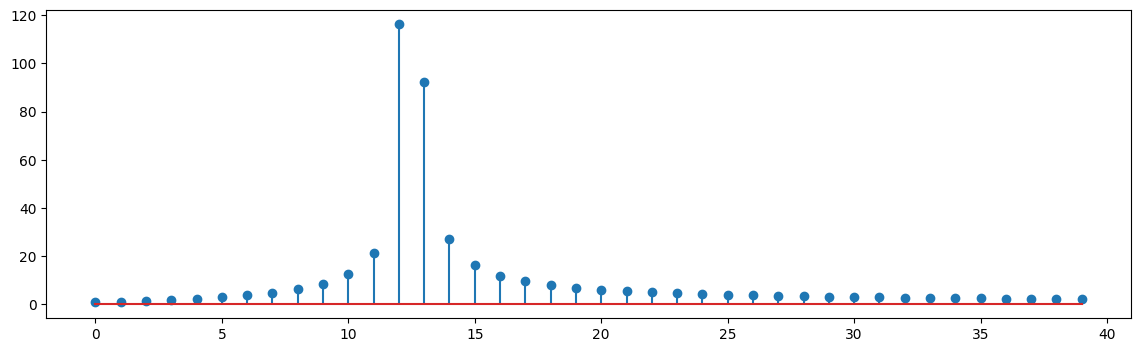

In [63]:
plt.stem(np.abs(np.fft.fft(two_cos(w, 0.6 * DN, N))[:40]));

## Zero-padding

Since the resolution of a DFT depends on the length of the data vector, one may erroneously assume that, by *artificially* extending a given data set, the resulting resolution would improve. Note that here we're not talking about *collecting* more data; rather, we have a data set and we append zeros (or any other constant value) to the end of it. This extension is called zero-padding.

The derivation of why zero-padding does not increase the resolution is detailed in course notes and here we will just show an example:

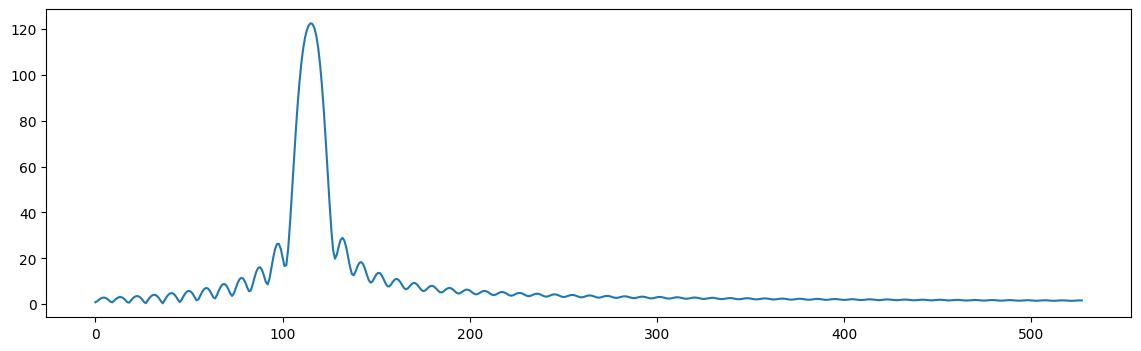

In [64]:
x_zp = np.r_[ two_cos(w, 0.6 * DN, N), np.zeros(2000) ]
plt.plot(np.abs(np.fft.fft(x_zp))[:528]);

On the other hand, if we had access to more data, the DFT resoultion would increase and we would be able to see the two distinct lines:

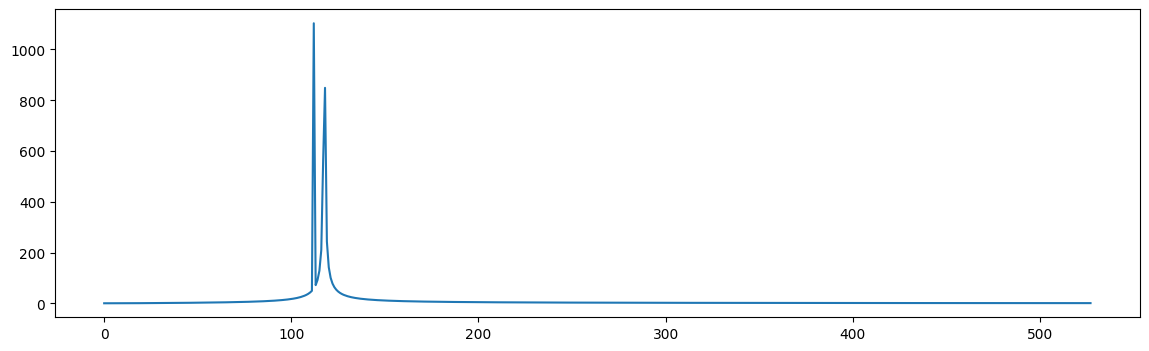

In [65]:
x_ext = two_cos(w, 0.6 * DN, N + 2000)
plt.plot(np.abs(np.fft.fft(x_ext))[:528]);